In [1]:
import pandas as pd
usaf_df = pd.read_csv(filepath_or_buffer='/kaggle/input/vietnam-war-losses/Vietnam_USAF_Losses_Cleaned_Data.csv', parse_dates=['Crash_Date']).drop(columns=['Mission_Type'])
usaf_df['crash year'] = usaf_df['Crash_Date'].dt.year
usaf_df.head()

,Crash_Date,Crash_Time,Aircraft_Type,Aircraft_SN,Base,Wing,Squadron,Weapon,Target_Objective,Ceiling_Vis,...,Pilot_Hit,Pilot_Rank,Pilot,Pilot_Egress,Pilot_Status,Pilot_Condition,Pilot_Recovered,Latitude,Longitude,crash year
0,1962-02-02,_,C-123B,564370,TSN,464TCW,_,_,Practice spray run,/..,...,_,Capt,Groves F. C.,Crash,KIA,_,_,NaN,NaN,1962
1,1962-02-11,_,SC-47A,4315732,BHA,_,4400CCTS,_,Leaflet drop near Dalat,/..,...,_,Capt,Kissam E. K.,Crash,KIA,_,_,11.75,107.0,1962
2,1962-08-28,_,T-28B,538376,_,_,_,_,_,/..,...,_,Capt,Simpson R. L.,_,KIA,_,_,NaN,NaN,1962
3,1962-10-15,_,U-10,625909,_,_,_,_,Not applicable,/..,...,_,Capt,Booth H. W.,Crash,KIA,_,_,NaN,NaN,1962
4,1962-10-16,_,T-28B,538365,_,_,_,_,Not applicable,/..,...,_,Capt,Chambers B. L.,Ejection,Recovered,Minor injuries,_,NaN,NaN,1962


In [2]:
from plotly.express import histogram
histogram(data_frame=usaf_df, x='Crash_Date')

Weird how the histogram has humps near US Presidential elections in 1968 and 1972. Probably a coincidence.

In [3]:
from plotly.express import bar
bar(data_frame=usaf_df[['Aircraft_Type', 'crash year']].groupby(by=['Aircraft_Type', 'crash year']).size().reset_index().sort_values(ascending=False, by=0).head(n=100), x='Aircraft_Type',
    y=0, color='crash year')

In [4]:
bar(data_frame=usaf_df[['Aircraft_Type', 'crash year']].groupby(by=['Aircraft_Type', 'crash year']).size().reset_index().sort_values(ascending=False, by=0).head(n=100), color='Aircraft_Type',
    y=0, x='crash year')

In [5]:
usaf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Crash_Date        1540 non-null   datetime64[ns]
 1   Crash_Time        1540 non-null   object        
 2   Aircraft_Type     1540 non-null   object        
 3   Aircraft_SN       1540 non-null   int64         
 4   Base              1540 non-null   object        
 5   Wing              1540 non-null   object        
 6   Squadron          1540 non-null   object        
 7   Weapon            1540 non-null   object        
 8   Target_Objective  1533 non-null   object        
 9   Ceiling_Vis       1540 non-null   object        
 10  Maneuver          1540 non-null   object        
 11  Pass              1540 non-null   int64         
 12  Angle             1540 non-null   int64         
 13  Altitude          1540 non-null   int64         
 14  Airspeed          1540 n

In [6]:
from plotly.express import scatter_geo
altitude_df = usaf_df[['Altitude', 'Latitude', 'Longitude']].dropna()
# we suspect unknown altitudes are recorded as zero, which skews our results
altitude_df = altitude_df[altitude_df['Altitude'] > 0]
scatter_geo(data_frame=altitude_df, lon='Longitude', lat='Latitude', color='Altitude', fitbounds='locations')

Funny how the bulk of the higher altitude losses occur near the Chinese border.

In [7]:
usaf_df.nunique()

Crash_Date          1053
Crash_Time           635
Aircraft_Type         75
Aircraft_SN         1531
Base                  40
Wing                  96
Squadron             173
Weapon                12
Target_Objective     582
Ceiling_Vis          195
Maneuver              15
Pass                  10
Angle                 11
Altitude              93
Airspeed              63
Mission_Phase          7
Where_Hit             28
Fire_Observed          3
Hit_Country            8
Loss_Country          10
Defense_Type         226
Pilot_Hit              3
Pilot_Rank            10
Pilot               1478
Pilot_Egress           8
Pilot_Status          16
Pilot_Condition        8
Pilot_Recovered       24
Latitude             525
Longitude            352
crash year            12
dtype: int64

In [8]:
for column in ['Base', 'Weapon', 'Maneuver', 'Pass', 'Angle', 'Mission_Phase', 'Fire_Observed', 'Hit_Country', 'Pilot_Hit', 'Pilot_Rank',
               'Pilot_Egress', 'Pilot_Status', 'Pilot_Recovered']:
    bar(data_frame=usaf_df[usaf_df[column] != '_'][column].value_counts().to_frame().reset_index(), x=column, y='count').show()

(-0.5, 1199.5, 1199.5, -0.5)

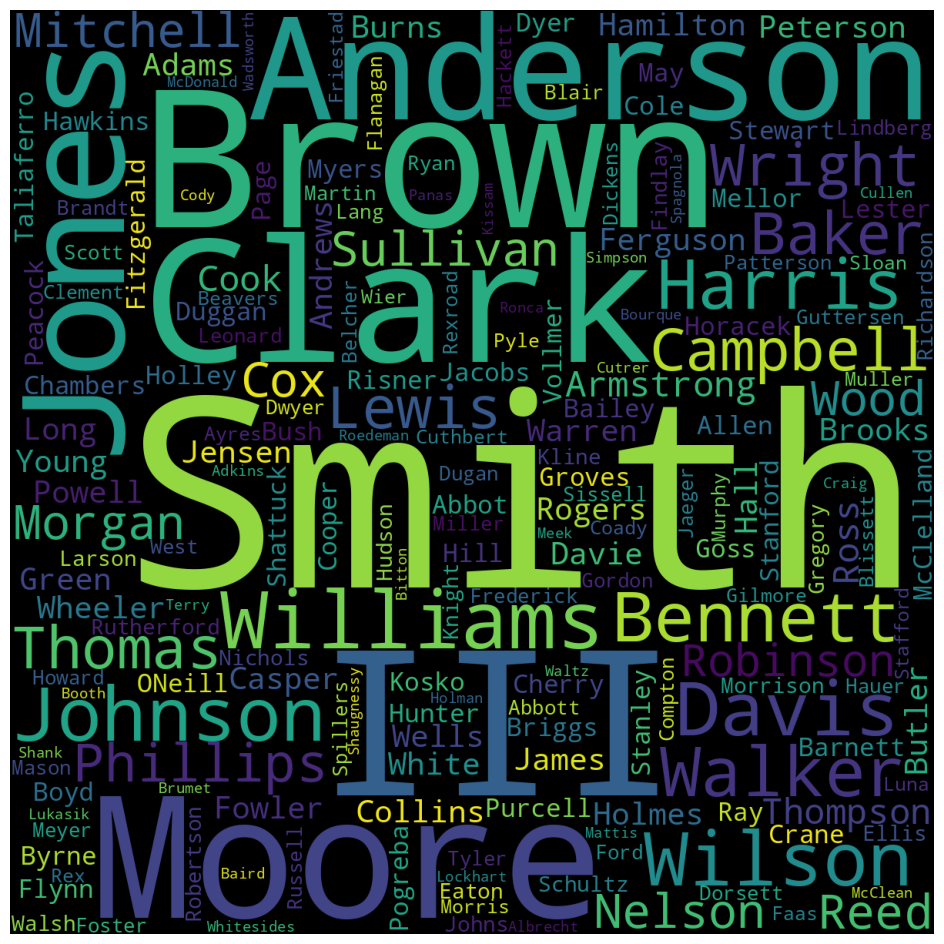

In [9]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

subplots(figsize=(12, 12))
# we want to cut out initials so we need to filter a little
text = ' '.join(item for item in ' '.join(usaf_df['Pilot'].values).split() if len(item) > 2)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')